In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# Memuat file performance trainee menjadi pandas dataframe
dataframe = pd.read_csv('trainee.csv')

## Menampilkan 5 baris pertama dari dataframe
dataframe.head()

,Gender,Position,Gen,Unit,Penempatan,Mentoring,Score,Kinerja
0,Male,WEALTH MANAGEMENT PROGRAM,Gen X,Cabang Tipe A,sesuai,Puas,92.4,Tidak Perform
1,Female,WEALTH MANAGEMENT PROGRAM,Gen Y,Cabang Tipe B,tidak sesuai,Tidak Puas,62.8,Tidak Perform
2,Female,MDP TRAINEE,Gen Z,Kantor Pusat,sesuai,Puas,99.7,Perform
3,Female,MDP TRAINEE,Gen Z,Cabang Tipe C,sesuai,Tidak Puas,82.7,Tidak Perform
4,Female,MDP TRAINEE,Gen Z,Kantor Pusat,sesuai,Puas,88.1,Perform


In [3]:
# Cek Tipe Data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      697 non-null    object 
 1   Position    697 non-null    object 
 2   Gen         697 non-null    object 
 3   Unit        697 non-null    object 
 4   Penempatan  697 non-null    object 
 5   Mentoring   697 non-null    object 
 6   Score       697 non-null    float64
 7   Kinerja     697 non-null    object 
dtypes: float64(1), object(7)
memory usage: 43.7+ KB


In [4]:
# Import LabelEncoder dari module sklearn
from sklearn.preprocessing import LabelEncoder

In [5]:
# Import LabelEncoder dari module sklearn
from sklearn.preprocessing import LabelEncoder

# Menyalin/copy dataframe agar dataframe awal tetap utuh
dataframe_int = dataframe.copy()

# Membuat objek/instance yang bernama encoder
encoder=LabelEncoder()

# Membuat list dari nama kolom data kategori
categorical_data=['Gender','Position','Gen','Unit','Penempatan','Mentoring','Kinerja']

# Mengubah setiap data kategori menjadi numerik dengan encoder
for kolom in categorical_data:
    dataframe_int[kolom]=encoder.fit_transform(dataframe[kolom])

# Sekarang data sudah berupa angka sepenuhnya
dataframe_int.head()

,Gender,Position,Gen,Unit,Penempatan,Mentoring,Score,Kinerja
0,1,9,0,0,0,0,92.4,1
1,0,9,1,1,1,1,62.8,1
2,0,1,2,3,0,0,99.7,0
3,0,1,2,2,0,1,82.7,1
4,0,1,2,3,0,0,88.1,0


In [6]:
for kolom in categorical_data:
    print(kolom,dataframe_int[kolom].unique())

Gender [1 0]
Position [9 1 0 5 3 2 4 8 7 6]
Gen [0 1 2]
Unit [0 1 3 2]
Penempatan [0 1]
Mentoring [0 1]
Kinerja [1 0]


In [7]:
for kolom in categorical_data:
    print(kolom,dataframe[kolom].unique())

Gender ['Male' 'Female']
Position ['WEALTH MANAGEMENT PROGRAM' 'MDP TRAINEE' 'BCA DEVELOPMENT PROGRAM - IT'
 'PROGRAM CUSTOMER RELATIONSHIP OFFICER' 'PROGRAM AUDIT INTERNAL'
 'PROGRAM ANALIS KREDIT' 'PROGRAM CREDIT PROCESSING OFFICER'
 'PROGRAM LEGAL OFFICER' 'PROGRAM JUNIOR BUSINESS ANALYST'
 'PROGRAM FRONTLINER CS KARTU KREDIT 12']
Gen ['Gen X' 'Gen Y' 'Gen Z']
Unit ['Cabang Tipe A' 'Cabang Tipe B' 'Kantor Pusat' 'Cabang Tipe C']
Penempatan ['sesuai' 'tidak sesuai']
Mentoring ['Puas' 'Tidak Puas']
Kinerja ['Tidak Perform' 'Perform']


In [8]:
# Menampilkan matrix korelasi antar kolom
dataframe_int.corr()

,Gender,Position,Gen,Unit,Penempatan,Mentoring,Score,Kinerja
Gender,1.000000,0.060311,0.049652,0.034808,0.070724,0.047885,-0.082752,0.079292
Position,0.060311,1.000000,-0.050169,-0.000380,0.043477,0.018247,-0.064716,0.048264
Gen,0.049652,-0.050169,1.000000,0.059845,-0.028603,0.024251,-0.046835,0.076320
Unit,0.034808,-0.000380,0.059845,1.000000,0.188670,0.106034,-0.188411,0.185744
Penempatan,0.070724,0.043477,-0.028603,0.188670,1.000000,0.007198,-0.213724,0.323231
Mentoring,0.047885,0.018247,0.024251,0.106034,0.007198,1.000000,-0.541794,0.695405
Score,-0.082752,-0.064716,-0.046835,-0.188411,-0.213724,-0.541794,1.000000,-0.615477
Kinerja,0.079292,0.048264,0.076320,0.185744,0.323231,0.695405,-0.615477,1.000000


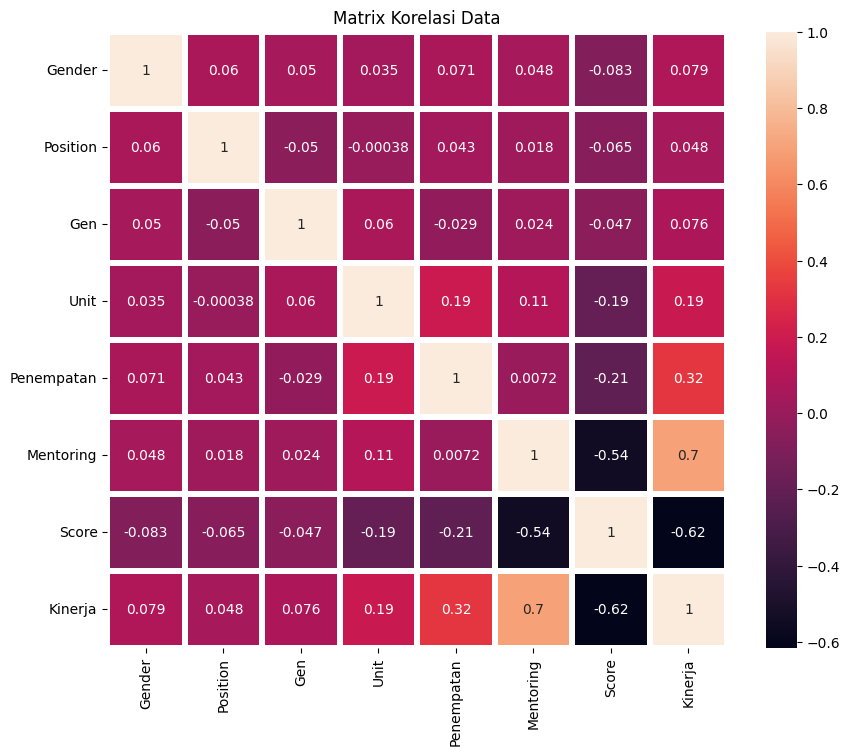

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title('Matrix Korelasi Data')
sns.heatmap(dataframe_int.corr(),annot=True,linewidths=3)
plt.show()

In [10]:
# Memisahkan dataframe awal menjadi data dan label
data = dataframe_int.drop('Kinerja',axis=1)
label = dataframe_int['Kinerja']

# Memisahkan dataframe menjadi data latihan dan data tes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

# Print dataframe.shape untuk mengetahui bentu dataframe
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(557, 7) (557,)
(140, 7) (140,)


In [11]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = rf.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9714285714285714


In [14]:
# Export the first three decision trees from the forest

#for i in range(3):
   # tree = rf.estimators_[i]
   # dot_data = export_graphviz(tree,feature_names=x_train.columns, filled=True,  max_depth=2, impurity=False, proportion=True)
   # graph = graphviz.Source(dot_data)
   # display(graph)

In [15]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C483397740>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C49FC885C0>})

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 298}


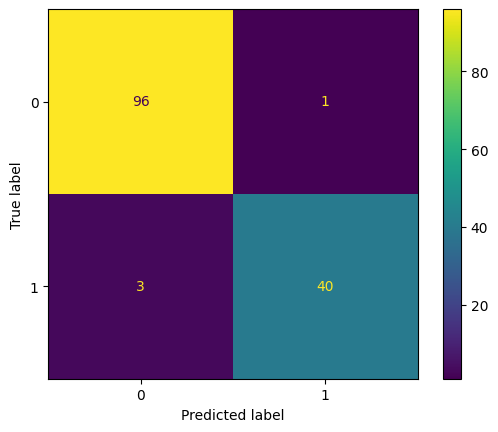

In [17]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9714285714285714
Precision: 0.975609756097561
Recall: 0.9302325581395349


In [19]:
import pickle
# Menyimpan model menjadi file .pkl
with open('Trainee_RF.pkl','wb') as file:
    pickle.dump(best_rf,file)

In [20]:
# Memuat model dalam file .pkl
with open('Trainee_RF.pkl','rb') as file:
    model = pickle.load(file)

In [21]:
def self_prediction():
    Gender = input('Gender : ')
    Position = input('Position : ')
    Gen = input('Gen : ')
    Unit = input('Penempatan : ')
    Penempatan = input('Kesesuaian Penempatan : ')
    Mentoring = input('Mentoring : ')
    Score = input('Score : ')

# data harus berbentuk (1,5) yaitu [[age,sex,bp,chol,NatoK]]
    print('\ny_pred')
    print('Kinerja : ',encoder.inverse_transform(model.predict([[Gender,Position,Gen,Unit,Penempatan,Mentoring,Score]]))[0])


In [22]:
# Melakukan prediksi dengan menginputkan paramater satu per satu
    
    #self_prediction()

In [23]:
# Memuat file performance trainee menjadi pandas dataframe
dataframe_test = pd.read_csv('trainee-test.csv')

## Menampilkan 5 baris pertama dari dataframe
dataframe_test.head()

# Menyalin/copy dataframe agar dataframe awal tetap utuh
dataframe_int2 = dataframe_test.copy()

# Membuat objek/instance yang bernama encoder
encoder=LabelEncoder()

# Membuat list dari nama kolom data kategori
categorical_data=['Gender','Position','Gen','Unit','Penempatan','Mentoring']

# Mengubah setiap data kategori menjadi numerik dengan encoder
for kolom in categorical_data:
    dataframe_int2[kolom]=encoder.fit_transform(dataframe_test[kolom])

# Sekarang data sudah berupa angka sepenuhnya
dataframe_int2.head()

,Gender,Position,Gen,Unit,Penempatan,Mentoring,Score,Kinerja
0,1,2,0,0,0,0,92.4,NaN
1,0,2,1,1,1,1,62.8,NaN
2,0,1,2,3,0,0,99.7,NaN
3,0,1,2,2,0,1,82.7,NaN
4,0,1,2,3,0,0,88.1,NaN


In [24]:
for kolom in categorical_data:
    print(kolom,dataframe_int2[kolom].unique())

Gender [1 0]
Position [2 1 0]
Gen [0 1 2]
Unit [0 1 3 2]
Penempatan [0 1]
Mentoring [0 1]


In [25]:
for kolom in categorical_data:
    print(kolom,dataframe_test[kolom].unique())

Gender ['Male' 'Female']
Position ['WEALTH MANAGEMENT PROGRAM' 'MDP TRAINEE' 'BCA DEVELOPMENT PROGRAM - IT']
Gen ['Gen X' 'Gen Y' 'Gen Z']
Unit ['Cabang Tipe A' 'Cabang Tipe B' 'Kantor Pusat' 'Cabang Tipe C']
Penempatan ['sesuai' 'tidak sesuai']
Mentoring ['Puas' 'Tidak Puas']


In [26]:
# Memisahkan dataframe awal menjadi data dan label
data2 = dataframe_int2.drop('Kinerja',axis=1)
label2 = dataframe_int2['Kinerja']

In [27]:
import joblib

# Load model dari file
modeldf = joblib.load('Trainee_RF.pkl')

In [28]:
prediksi2=model.predict(data2)

In [29]:
data2['prediksi2']=prediksi2
data2.to_csv('hasil_tahap_1.csv',index=False)

In [30]:
# Memisahkan dataframe awal menjadi data dan label
data3 = dataframe_test.drop('Kinerja',axis=1)
label3 = dataframe_test['Kinerja']

In [31]:
# Mengembalikan value data asli yang telah diubah menjadi categori_data

data3['prediksi2']=prediksi2


In [32]:
import pandas as pd

# Contoh DataFrame
df_final_pred = pd.DataFrame(data3)

# Mengubah nilai 0 menjadi Perform dan 1 menjadi Tidak Perform pada kolom prediksi2
df_final_pred.loc[df_final_pred['prediksi2'] == 0, 'prediksi2'] = "Perform" 
df_final_pred.loc[df_final_pred['prediksi2'] == 1, 'prediksi2'] = "Tidak Perform"

print(df_final_pred)


    Gender                   Position    Gen           Unit    Penempatan  \
0     Male  WEALTH MANAGEMENT PROGRAM  Gen X  Cabang Tipe A        sesuai   
1   Female  WEALTH MANAGEMENT PROGRAM  Gen Y  Cabang Tipe B  tidak sesuai   
2   Female                MDP TRAINEE  Gen Z   Kantor Pusat        sesuai   
3   Female                MDP TRAINEE  Gen Z  Cabang Tipe C        sesuai   
4   Female                MDP TRAINEE  Gen Z   Kantor Pusat        sesuai   
..     ...                        ...    ...            ...           ...   
76  Female                MDP TRAINEE  Gen Z   Kantor Pusat  tidak sesuai   
77    Male                MDP TRAINEE  Gen Z  Cabang Tipe B        sesuai   
78  Female                MDP TRAINEE  Gen Z  Cabang Tipe C        sesuai   
79  Female                MDP TRAINEE  Gen Y  Cabang Tipe C  tidak sesuai   
80    Male                MDP TRAINEE  Gen Z  Cabang Tipe C        sesuai   

     Mentoring  Score      prediksi2  
0         Puas   92.4        Perform

C:\Users\u064858\AppData\Local\Temp\ipykernel_11244\4187477507.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Perform' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final_pred.loc[df_final_pred['prediksi2'] == 0, 'prediksi2'] = "Perform"


In [33]:
# hasil prediksi dalam bentuk kategori data
data3.to_csv('hasil_tahap_2.csv',index=False)

# hasil prediksi dalam bentuk data asli
df_final_pred.to_csv('hasil_tahap_3.csv',index=False)